In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Generate synthetic dataset
np.random.seed(42)  # for reproducibility

n = 100
data = {
    'Study_Hours': np.random.uniform(1, 10, n),
    'Sleep_Hours': np.random.uniform(4, 9, n),
    'Attendance': np.random.uniform(60, 100, n),
    'Previous_Score': np.random.uniform(40, 95, n),
    'Internet_Usage_Hours': np.random.uniform(1, 8, n)
}

df = pd.DataFrame(data)

# Add target variable (Final_Score) with some realistic relation + noise
df['Final_Score'] = (
    5 * df['Study_Hours'] +
    2 * df['Sleep_Hours'] +
    0.3 * df['Attendance'] +
    0.4 * df['Previous_Score'] -
    1.5 * df['Internet_Usage_Hours'] +
    np.random.normal(0, 5, n)   # random noise
)

# Round for neatness
df = df.round(2)
df.head(3)


,Study_Hours,Sleep_Hours,Attendance,Previous_Score,Internet_Usage_Hours,Final_Score
0,4.37,4.16,85.68,42.84,1.72,72.14
1,9.56,7.18,63.37,69.22,7.32,107.25
2,7.59,5.57,66.47,69.73,4.54,94.86


In [17]:
col_max_pairs = [(col, df[col].max()) for col in df.columns]
print(col_max_pairs)


[('Study_Hours', 9.88), ('Sleep_Hours', 8.93), ('Attendance', 99.6), ('Previous_Score', 94.48), ('Internet_Usage_Hours', 7.95), ('Final_Score', 119.28)]


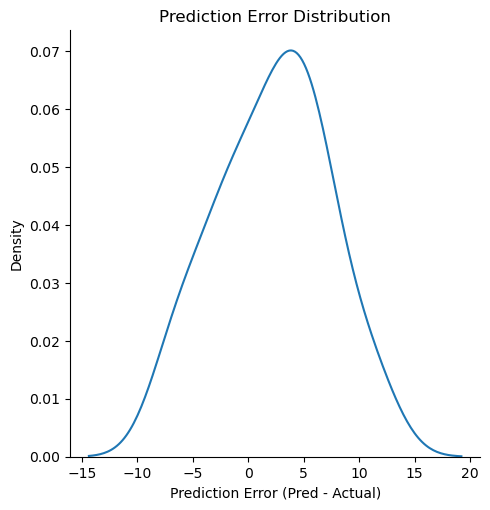

R² Score: 0.8772855354647675


In [34]:
# Feature Scaling (Standardization)
X = df.drop('Final_Score', axis=1)
y = df['Final_Score']

# 1️⃣ Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 2️⃣ Apply StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 3️⃣ Train Linear Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# 4️⃣ Predict on test data
pred = lr.predict(X_test)

# 5️⃣ Visualize prediction errors
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(pred - y_test, kind='kde')
plt.title("Prediction Error Distribution")
plt.xlabel("Prediction Error (Pred - Actual)")
plt.show()

# 6️⃣ Evaluate Model
from sklearn.metrics import r2_score
score = r2_score(y_test, pred)
print("R² Score:", score)


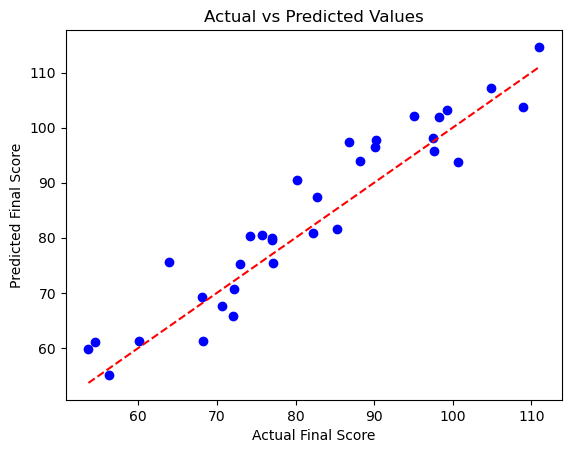

In [35]:
plt.scatter(y_test, pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Final Score')
plt.ylabel('Predicted Final Score')
plt.title('Actual vs Predicted Values')
plt.show()
